In [1]:
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('Final database.csv')

In [75]:
df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170633 entries, 0 to 170632
Data columns (total 151 columns):
 #    Column               Non-Null Count   Dtype  
---   ------               --------------   -----  
 0    Country              170633 non-null  object 
 1    Uri                  170633 non-null  object 
 2    Popularity           170633 non-null  float64
 3    Title                170633 non-null  object 
 4    Artist               170633 non-null  object 
 5    Album/Single         170633 non-null  object 
 6    Genre                170633 non-null  object 
 7    Artist_followers     170592 non-null  object 
 8    Explicit             170633 non-null  object 
 9    Album                170633 non-null  object 
 10   Release_date         170633 non-null  object 
 11   Track_number         170633 non-null  object 
 12   Tracks_in_album      170633 non-null  object 
 13   danceability         170633 non-null  object 
 14   energy               170633 non-null  object 
 15 

In [4]:
#usuwanie niepotrzebnych kolumn
columns_to_drop = np.concatenate([np.arange(8, 13), np.arange(26, 34), np.arange(55, 63), np.arange(73, 126), np.arange(127, 147)])
df2 = df.drop(df.columns[columns_to_drop], axis=1)

In [5]:
df2.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170633 entries, 0 to 170632
Data columns (total 57 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Country           170633 non-null  object 
 1   Uri               170633 non-null  object 
 2   Popularity        170633 non-null  float64
 3   Title             170633 non-null  object 
 4   Artist            170633 non-null  object 
 5   Album/Single      170633 non-null  object 
 6   Genre             170633 non-null  object 
 7   Artist_followers  170592 non-null  object 
 8   danceability      170633 non-null  object 
 9   energy            170633 non-null  object 
 10  key               170633 non-null  object 
 11  loudness          170633 non-null  object 
 12  mode              170633 non-null  object 
 13  speechiness       170633 non-null  object 
 14  acoustics         170633 non-null  object 
 15  instrumentalness  170633 non-null  object 
 16  liveliness        17

In [6]:
df2.isnull().sum()

Country                 0
Uri                     0
Popularity              0
Title                   0
Artist                  0
Album/Single            0
Genre                   0
Artist_followers       41
danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acoustics               0
instrumentalness        0
liveliness              0
valence                 0
tempo                   0
duration_ms             0
time_signature          0
bolero                  0
boy band                0
country                 0
dance/electronic        0
else                    0
funk                    0
hip hop                 0
house                   0
indie                   0
jazz                    0
k-pop                   0
latin                   0
metal                   0
opm                     0
pop                     0
r&b/soul                0
rap                     0
reggae      

In [7]:
# filtrowanie wierszy "Poland"
spotify_poland_df = df2[df2['Country'] == "Poland"].copy()

In [8]:
# filtrowanie wierszy "single"
spotify_poland_df2 = spotify_poland_df[spotify_poland_df['Album/Single'] == "single"].copy()

In [24]:
# 10 najbardziej popularnych piosenek, filtrowanie po kolumnie "Popularity"
top10_popularity_songs = spotify_poland_df2.nlargest(10, 'Popularity')

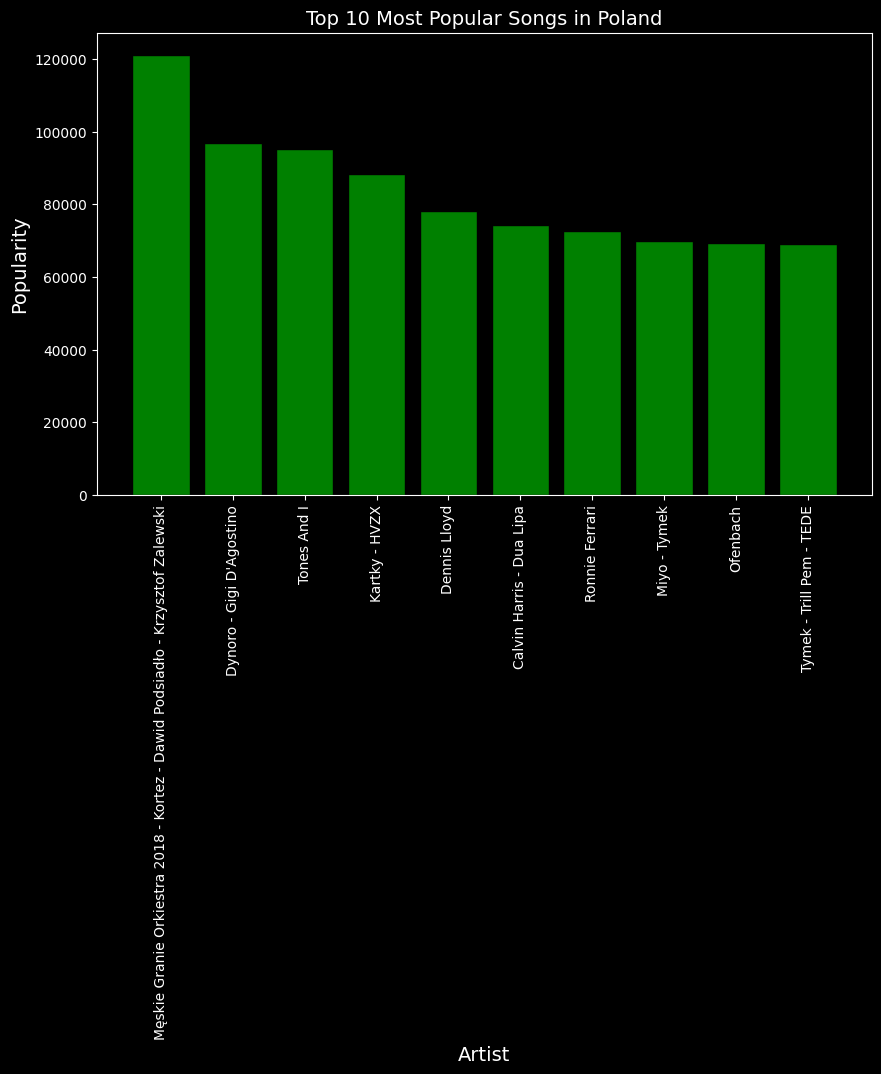

In [102]:
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
plt.bar(top10_popularity_songs['Artist'], top10_popularity_songs['Popularity'], color='green', edgecolor='black')
plt.xlabel('Artist', fontsize=14, )
plt.ylabel('Popularity', fontsize=14)
plt.title('Top 10 Most Popular Songs in Poland', fontsize=14)
plt.xticks(rotation=90)
plt.gca().set_facecolor('black')
plt.show()

In [31]:
# przyklad korelacji Popularity z kolumną "key"
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

spotify_poland_df2['key'] = spotify_poland_df2['key'].astype(float)
spotify_poland_df2["key_encoded"] = label_encoder.fit_transform(spotify_poland_df2['key'])

correlation = spotify_poland_df2['Popularity'].corr(spotify_poland_df2['key_encoded'])
correlation

0.03296366070618923

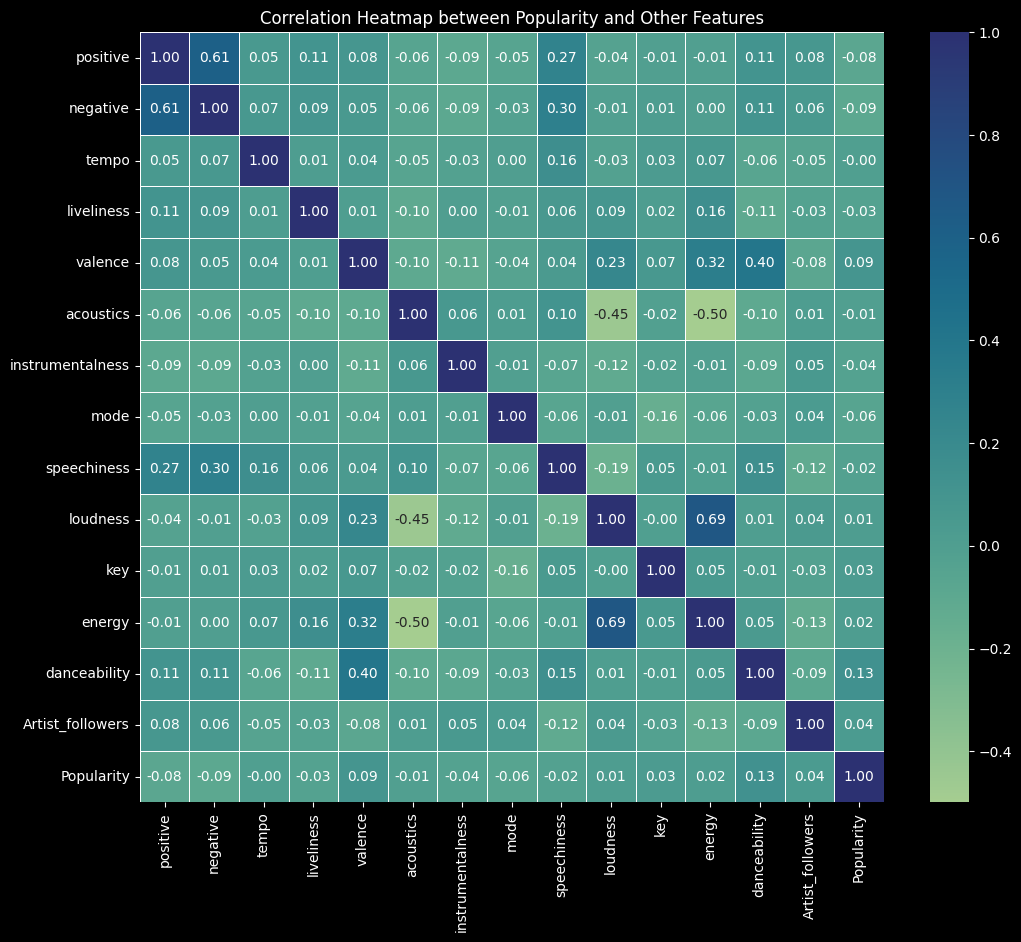

In [60]:
# przedstawienie mapy koleracji cech utworów z "Popularity"

column_names = {
    51: 'positive',
    50: 'negative',
    18: 'tempo',
    16: 'liveliness',
    17: 'valence',
    14: 'acoustics',
    15: 'instrumentalness',
    12: 'mode',
    13: 'speechiness',
    11: 'loudness',
    10: 'key',
    9: 'energy',
    8: 'danceability',
    7: 'Artist_followers',
}
for column_number, column_name in column_names.items():
    spotify_poland_df2[column_name] = pd.to_numeric(spotify_poland_df2[column_name], errors='coerce')

selected_columns = list(column_names.values())
selected_columns.append('Popularity')

subset_df = spotify_poland_df2[selected_columns]

correlation_matrix = subset_df.corr()

plt.style.use('dark_background')
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="crest", fmt=".2f", linewidth=.5)
plt.title('Correlation Heatmap between Popularity and Other Features')
plt.show()


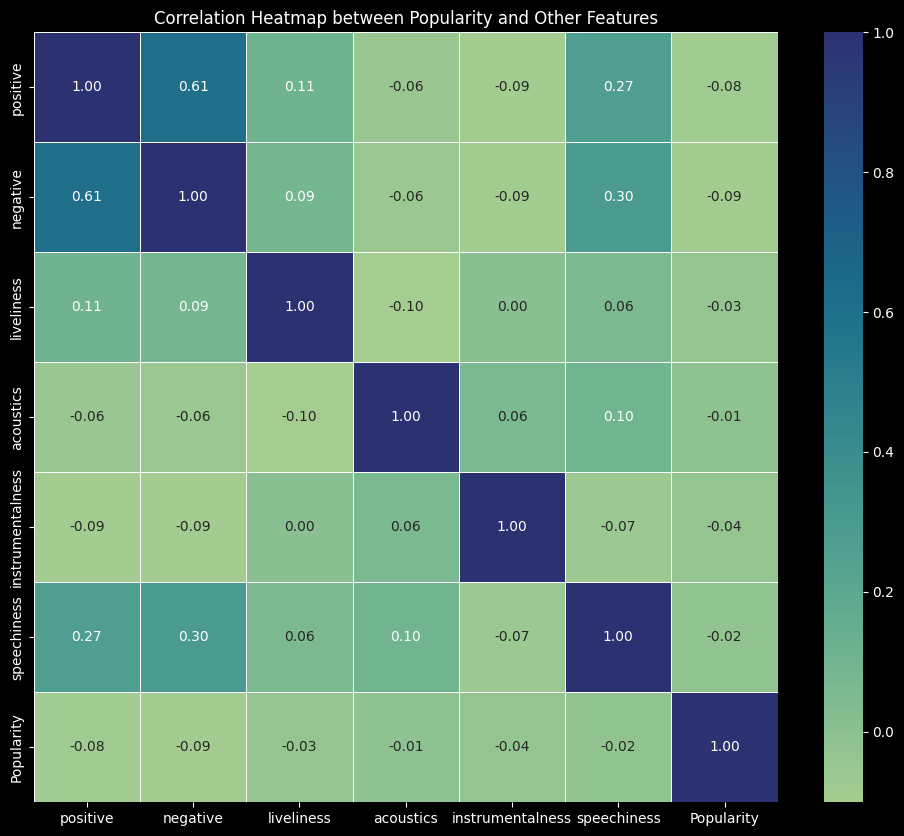

In [61]:
column_names = {
    51: 'positive',
    50: 'negative',
    16: 'liveliness',
    14: 'acoustics',
    15: 'instrumentalness',
    13: 'speechiness',
}
for column_number, column_name in column_names.items():
    spotify_poland_df2[column_name] = pd.to_numeric(spotify_poland_df2[column_name], errors='coerce')

selected_columns = list(column_names.values())
selected_columns.append('Popularity')

subset_df = spotify_poland_df2[selected_columns]

correlation_matrix = subset_df.corr()


plt.style.use('dark_background')
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="crest", fmt=".2f", linewidth=.5)
plt.title('Correlation Heatmap between Popularity and Other Features')
plt.show()

In [16]:
# wybranie utworów, które występowały na top liście spotify dłużej niż jeden miesiąc i miały tendencję wzrostową 

song_titles = ['bali', 'język ciała', 'havana', 'blinding lights',
               'dynamite', 'worldwide', 'crazy', 'xo tour llif3',
               'dont leave me alone', 'summer air', 'glorious', 'california',
               'two high', 'mad love', 'mood', 'szampan',
               'bestia', 'what lovers do', 'more that you know', 'biznes',
               'weź nie pytaj', 'mama', 'heather', 'testarossa',
               'natural', 'thunderclouds', 'melodia', 'physical',
               'lubię', 'nowy kolor feat. taco hemingway', 'head & heart', 'head shoulders knees & toes',
               'kosmita', 'old town road - remix', 'dont start now', 'let you love me',
               'lemonade', 'rockstar', 'roses - imanbek remix', 'midnight sky',
               'what about us', 'impreza', 'you broke me first', 'youngblood',
               'thunder', 'take you dancing', 'blue', 'rooftop']

songs = spotify_poland_df2[spotify_poland_df2['Title'].isin(song_titles)].copy()

In [76]:
songs.to_csv('Music Tracks with an Upward Trend.csv', index=False)

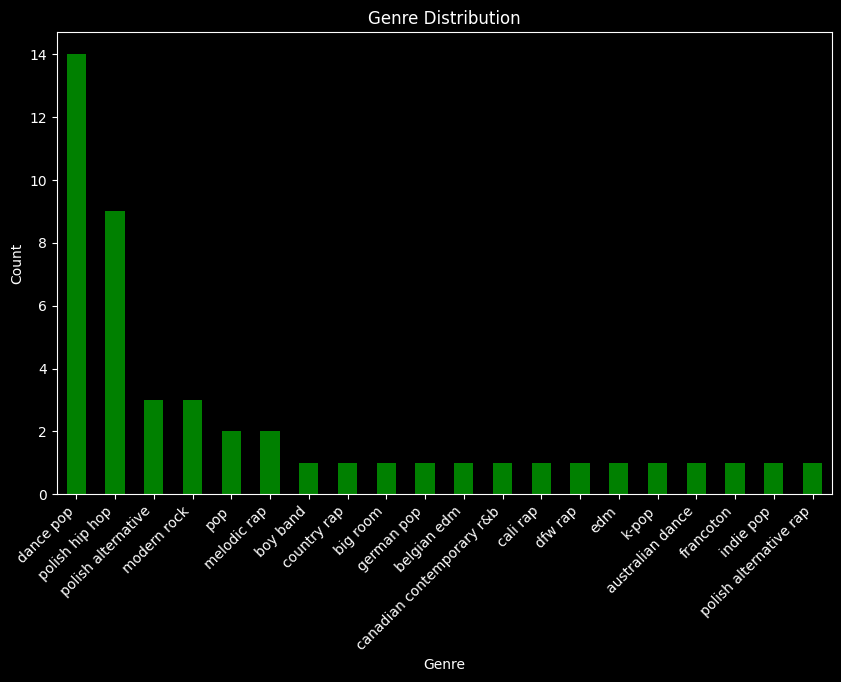

In [64]:
# ich style muzyczne
genre_counts = songs['Genre'].value_counts()
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='green')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Distribution')
plt.xticks(rotation=45, ha='right')
plt.show()

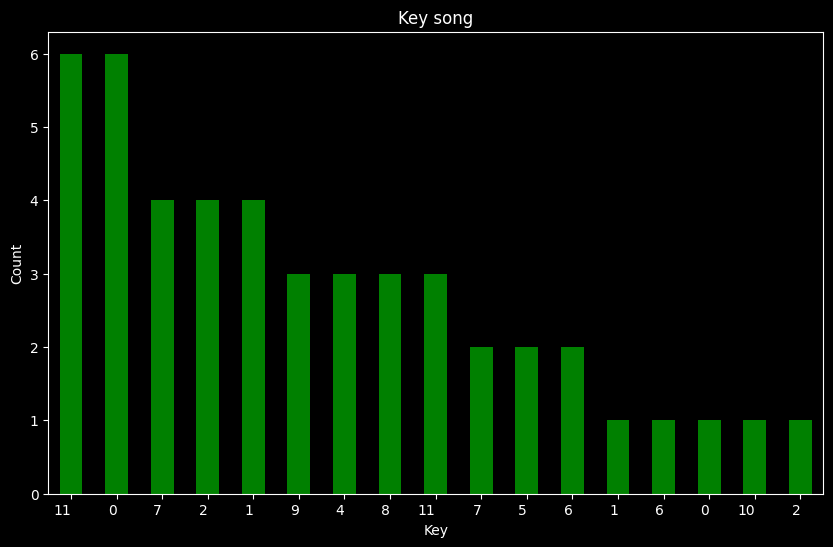

In [74]:
# ich tonacje
genre_counts = songs['key'].value_counts()
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='green')
plt.xlabel('Key')
plt.ylabel('Count')
plt.title('Key song')
plt.xticks(rotation=0, ha='right') 
plt.show()

In [ ]:
average_confidence = songs['acoustics'].median()
average_confidence

0.0635

In [ ]:
average_confidence = songs['valence'].mean()
average_confidence

0.5138063829787235

In [ ]:
average_confidence = songs['valence'].median()
average_confidence

0.556

In [83]:
# utwory które osiągnęły 1 miejsce w top200 w Polsce (single)
popumax1_songs = spotify_poland_df2.nsmallest(53, 'Popu_max')
popumax1_songs.head(2)

,Country,Uri,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,danceability,energy,...,surprise,trust,negative,positive,Global,Popu_max,Top10_dummy,Top50_dummy,Cluster,key_encoded
23938,Poland,https://open.spotify.com/track/0TK2YIli7K1leLo...,20178.0,señorita,Shawn Mendes - Camila Cabello,single,canadian pop,29743681.0,0.759,0.540,...,3.0,1.0,4.0,4.0,0,1,1.0,1.0,english speaking and nordic,9
29812,Poland,https://open.spotify.com/track/1j4kHkkpqZRBwE0...,58240.5,dusk till dawn - radio edit,ZAYN - Sia,single,dance pop,13407533.0,0.258,0.437,...,NaN,NaN,NaN,NaN,0,1,1.0,1.0,english speaking and nordic,11


In [86]:
# załadowanie większego zbioru danych
df_large = pd.read_csv("Database to calculate popularity.csv")
df_large.head()

,Unnamed: 0,country,date,position,uri,track,title,artist
0,0,Global,05/11/2020,1.0,https://open.spotify.com/track/47EiUVwUp4C9fGc...,"Dakiti , Bad Bunny, Jhay Cortez",Dakiti,"Bad Bunny, Jhay Cortez"
1,1,Global,05/11/2020,2.0,https://open.spotify.com/track/35mvY5S1H3J2QZy...,"positions , Ariana Grande",positions,Ariana Grande
2,2,Global,05/11/2020,3.0,https://open.spotify.com/track/3tjFYV6RSFtuktY...,"Mood , 24kGoldn",Mood,24kGoldn
3,3,Global,05/11/2020,4.0,https://open.spotify.com/track/7hxHWCCAIIxFLCz...,"Lemonade , Internet Money",Lemonade,Internet Money
4,4,Global,05/11/2020,5.0,https://open.spotify.com/track/4y4spB9m0Q6026K...,"Lonely , Justin Bieber",Lonely,Justin Bieber


In [87]:
df_large.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9807001 entries, 0 to 9807000
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  9807001 non-null  int64  
 1   country     9807000 non-null  object 
 2   date        9807000 non-null  object 
 3   position    9807000 non-null  float64
 4   uri         9807000 non-null  object 
 5   track       9807000 non-null  object 
 6   title       9807000 non-null  object 
 7   artist      9791359 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 598.6+ MB


In [88]:
df_large_poland = df_large[df_large['country'] == "Poland"].copy()

In [92]:
# filtrowanie utworów po URI
df_large_first_song = df_large_poland[df_large_poland['uri'] == 'https://open.spotify.com/track/7nZmah2llfvLDiUjm0kiyz']
df_large_first_song.min()

Unnamed: 0                                              8319190
country                                                  Poland
date                                                 01/02/2018
position                                                    1.0
uri           https://open.spotify.com/track/7nZmah2llfvLDiU...
track                                 Friends  , Justin Bieber 
title                                                 Friends  
artist                                           Justin Bieber 
dtype: object

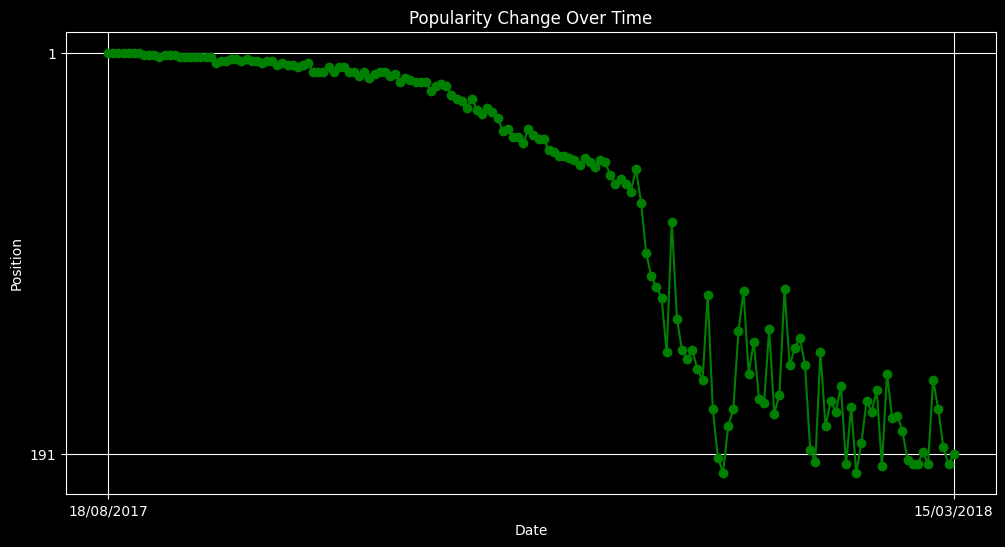

In [93]:
plt.figure(figsize=(12, 6))
plt.plot(df_large_first_song['date'], df_large_first_song['position'], marker='o', linestyle='-', color='green')
plt.title('Popularity Change Over Time')
plt.xlabel('Date')
plt.ylabel('Position')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.xticks([df_large_first_song['date'].iloc[0], df_large_first_song['date'].iloc[-1]])
plt.yticks([df_large_first_song['position'].iloc[0], df_large_first_song['position'].iloc[-1]])
plt.grid(True)
plt.show()